In [87]:
import numpy as np
import pandas as pd
import torch
from torchvision import datasets
from torchvision.transforms import transforms

In [88]:
num_workers = 0
batch_size = 64

transform = transforms.ToTensor()

#Download Data
train_data = datasets.MNIST(root='data',train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data',train=False, download=True, transform=transform)

#Load Data
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=0)

#Create iterable object for data
images, labels = next(iter(trainloader))
test_images, test_labels = next(iter(testloader))

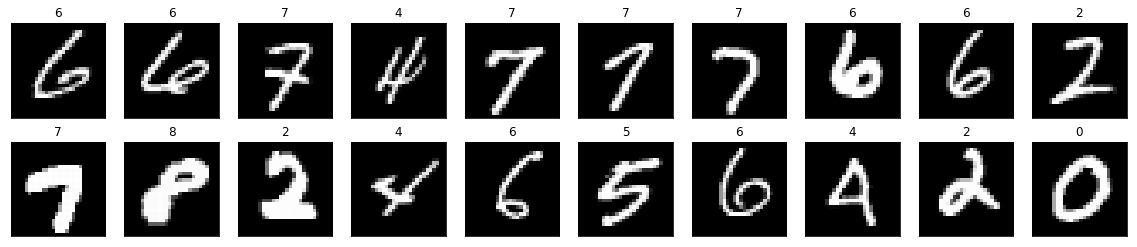

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(trainloader))
test_images, test_labels = next(iter(testloader))
images = images.numpy()

fig = plt.figure(figsize=(20,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

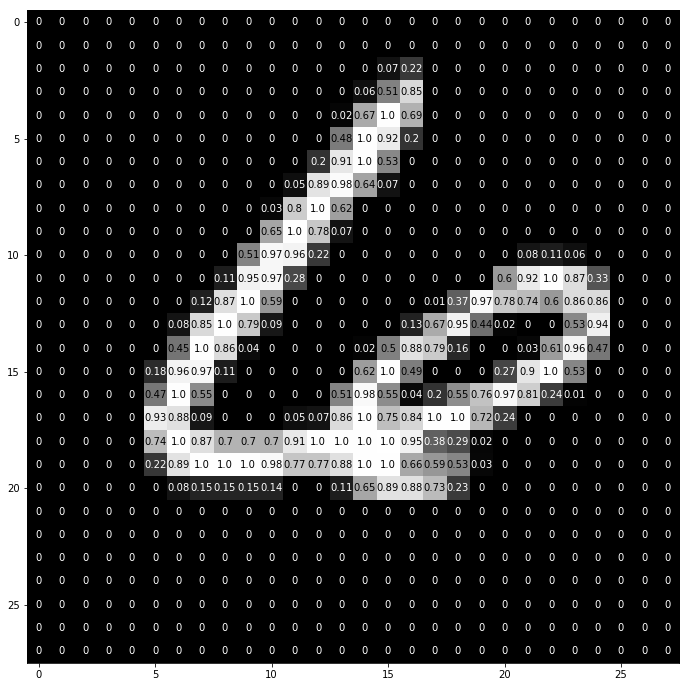

In [90]:
img = np.squeeze(images[1])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [75]:
import torch.nn as nn
import torch.nn.functional as F

#Define Network Architecture
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc_out = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1) # Flattens the input
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc_out(x)
        return x
    
model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc_out): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [76]:
from torch import optim

criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss() IFF we are using LogSoftmax(dim=1) in the model class
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [78]:
epochs = 10

model.train() #Prep model for training

for epochs in range(epochs):
    train_loss = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss = train_loss/len(trainloader.dataset)
    
    print("train_loss: {} \t epoch: {}".format(train_loss,epochs+1))

train_loss: 0.0013736112226111193 	 epoch: 1
train_loss: 0.0013954509800464924 	 epoch: 2
train_loss: 0.001310413278619914 	 epoch: 3
train_loss: 0.001226035056031833 	 epoch: 4
train_loss: 0.0013119617178289143 	 epoch: 5
train_loss: 0.0012975166562682716 	 epoch: 6
train_loss: 0.0012307616207886895 	 epoch: 7
train_loss: 0.0011148721067426473 	 epoch: 8
train_loss: 0.0011543810481896798 	 epoch: 9
train_loss: 0.0011758393417966241 	 epoch: 10


In [84]:
test_loss = 0.0
model.eval()

with torch.no_grad():
    for images, target in testloader:
        output = model(images)
        loss = criterion(output, target)
        test_loss += loss
        print(test_loss / len(testloader))

tensor(0.0008)
tensor(0.0010)
tensor(0.0010)
tensor(0.0024)
tensor(0.0025)
tensor(0.0028)
tensor(0.0028)
tensor(0.0028)
tensor(0.0028)
tensor(0.0057)
tensor(0.0059)
tensor(0.0059)
tensor(0.0071)
tensor(0.0071)
tensor(0.0074)
tensor(0.0083)
tensor(0.0083)
tensor(0.0086)
tensor(0.0088)
tensor(0.0091)
tensor(0.0105)
tensor(0.0105)
tensor(0.0115)
tensor(0.0125)
tensor(0.0132)
tensor(0.0134)
tensor(0.0136)
tensor(0.0141)
tensor(0.0151)
tensor(0.0155)
tensor(0.0156)
tensor(0.0164)
tensor(0.0177)
tensor(0.0205)
tensor(0.0205)
tensor(0.0212)
tensor(0.0212)
tensor(0.0226)
tensor(0.0229)
tensor(0.0238)
tensor(0.0243)
tensor(0.0250)
tensor(0.0268)
tensor(0.0283)
tensor(0.0284)
tensor(0.0289)
tensor(0.0289)
tensor(0.0292)
tensor(0.0294)
tensor(0.0305)
tensor(0.0306)
tensor(0.0318)
tensor(0.0320)
tensor(0.0333)
tensor(0.0335)
tensor(0.0366)
tensor(0.0372)
tensor(0.0374)
tensor(0.0378)
tensor(0.0379)
tensor(0.0382)
tensor(0.0414)
tensor(0.0414)
tensor(0.0414)
tensor(0.0426)
tensor(0.0445)
tensor(0.0